Problem Statement -Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering  on the principal components dataset (use the scree plot technique to obtain the optimum number clusters in K-means clustering and check if you’re getting similar results with and without PCA).

Business Objectives - The primary business objective of this analysis is to effectively segment patients based on their characteristics to optimize the development and marketing of a new heart disease medication. By applying hierarchical and K-means clustering on both the original dataset and a dimensionally reduced dataset obtained through Principal Component Analysis (PCA), the aim is to maximize the understanding of underlying patterns and enhance the accuracy of patient segmentation. This process allows the company to identify the most relevant patient groups for clinical trials and targeted marketing, thereby maximizing the commercial potential of the medication.

Minimize - PCA reduces the dimensionality of the data, which in turn minimizes the computational resources required for clustering algorithms.

Maximize -Maximizing Data Insights by applying hierarchical and K-means clustering on both the original dataset and the PCA-transformed dataset, the goal is to maximize the understanding of underlying patterns in the patient data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
wine = pd.read_csv("D:/Documents/Datasets/Wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
wine.shape

(178, 14)

In [8]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [18]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [20]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

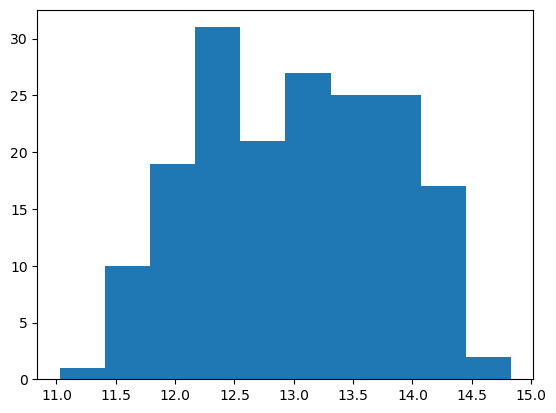

In [22]:
plt.hist(data=wine,x="Alcohol")

(array([18., 59., 33., 16., 14., 11., 14.,  7.,  3.,  3.]),
 array([0.74 , 1.246, 1.752, 2.258, 2.764, 3.27 , 3.776, 4.282, 4.788,
        5.294, 5.8  ]),
 <BarContainer object of 10 artists>)

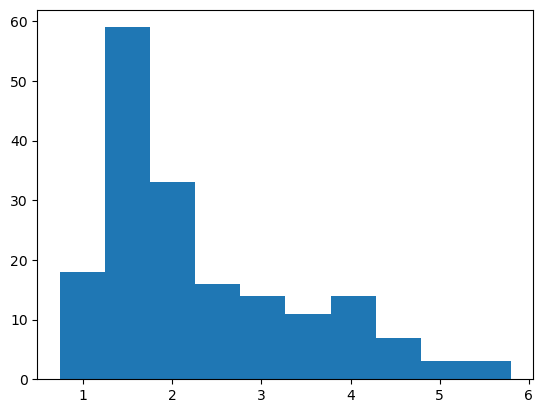

In [23]:
plt.hist(data=wine,x="Malic")

(array([ 1.,  3.,  7., 14., 43., 54., 31., 20.,  3.,  2.]),
 array([1.36 , 1.547, 1.734, 1.921, 2.108, 2.295, 2.482, 2.669, 2.856,
        3.043, 3.23 ]),
 <BarContainer object of 10 artists>)

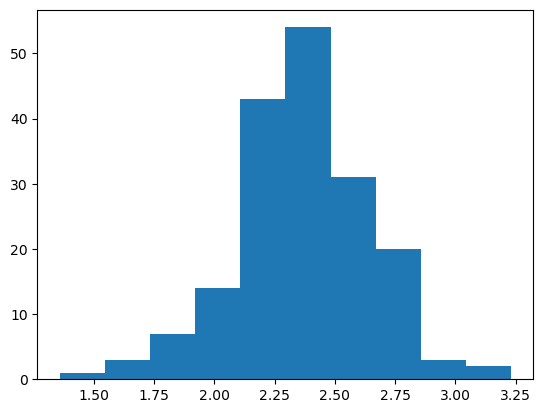

In [25]:
plt.hist(data=wine,x="Ash")

(array([33., 18., 23., 20., 32., 32., 14.,  5.,  0.,  1.]),
 array([0.34 , 0.814, 1.288, 1.762, 2.236, 2.71 , 3.184, 3.658, 4.132,
        4.606, 5.08 ]),
 <BarContainer object of 10 artists>)

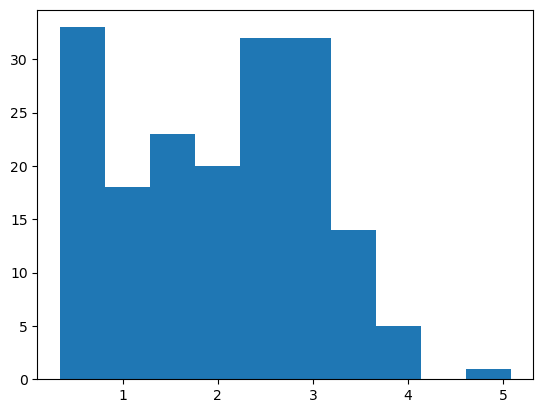

In [27]:
plt.hist(data=wine,x="Flavanoids")

In [29]:
#either by using normalization or standardization
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [32]:
# Now apply this normalization function to airlines datframe for all the rows and column from 1 until end

df_norm=norm_func(wine.iloc[:,:])
TWSS=[]
k=list(range(2,14))
# The values generated by TWSS are 12 and two get x and y values 12 by 12 ,range has been changed 2:14


In [34]:
from sklearn.cluster import KMeans
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
TWSS

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[75.89402919062441,
 49.84918136799644,
 47.52719591623987,
 43.03655897107563,
 41.074337142685174,
 38.97318853526027,
 37.95099199387539,
 35.904943968962456,
 35.8376812082849,
 32.878025977692076,
 33.74884689494422,
 30.999179336754526]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Type
2    71
1    59
3    48
Name: count, dtype: int64

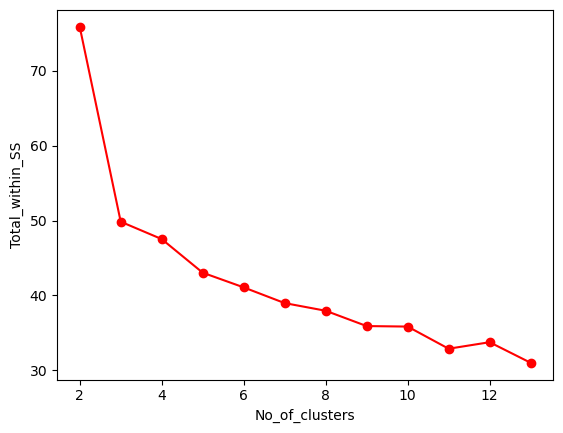

In [35]:
plt.plot(k,TWSS,'ro-')
plt.xlabel("No_of_clusters")
plt.ylabel("Total_within_SS")
# from the plot it is clear that the TWSS is reducing from k=2 to 3 and 3 to 4 
model=KMeans(n_clusters=3)
model.fit(df_norm)
model.labels_
mb=pd.Series(model.labels_)
wine['clust']=mb
wine.head()
wine=wine.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
wine.Type.value_counts()

In [36]:
wine.clust.value_counts()

clust
2    69
1    60
0    49
Name: count, dtype: int64

In [37]:
wine1 = pd.read_csv("D:/Documents/Datasets/Wine.csv")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

# Considering only numerical data 
wine1.data = wine1.iloc[:,1:]

# Normalizing the numerical data 
wine1_normal = scale(wine1.data)
wine1_normal

pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine1_normal)

# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var


C:\Users\HP\AppData\Local\Temp\ipykernel_240364\1243797865.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.data = wine1.iloc[:,1:]


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [42]:
# PCA weights
pca.components_
pca.components_[0]

# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1


array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 ])

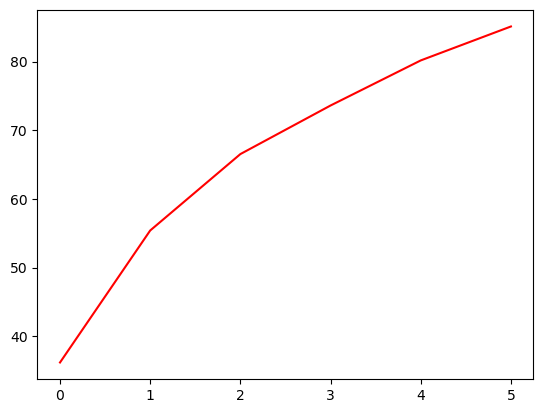

In [44]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

# PCA scores
pca_values

pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([wine1.Type, pca_data.iloc[:, 0:3]], axis = 1)

final1=final.iloc[:,1:]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Type
2    71
1    59
3    48
Name: count, dtype: int64

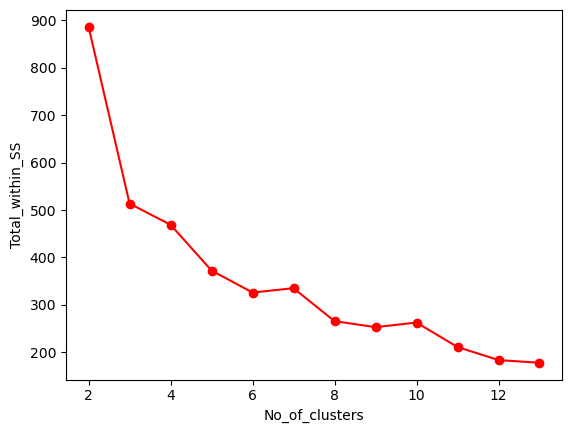

In [46]:
TWSS=[]
k=list(range(2,14))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(final1)
    TWSS.append(kmeans.inertia_)
TWSS

plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_clusters");plt.ylabel("Total_within_SS")
model=KMeans(n_clusters=3)
model.fit(final1)
model.labels_
mb=pd.Series(model.labels_)
final['clust']=mb

final.Type.value_counts()

In [47]:
final.clust.value_counts()

clust
0    68
1    59
2    51
Name: count, dtype: int64

In [48]:
#Aglomerative clustering
import pandas as pd
import matplotlib.pylab as plt
wine3=pd.read_csv("D:/Documents/Datasets/Wine.csv")
#perform normalization 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

df_norm=norm_func(wine3.iloc[:,:])
df_norm.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


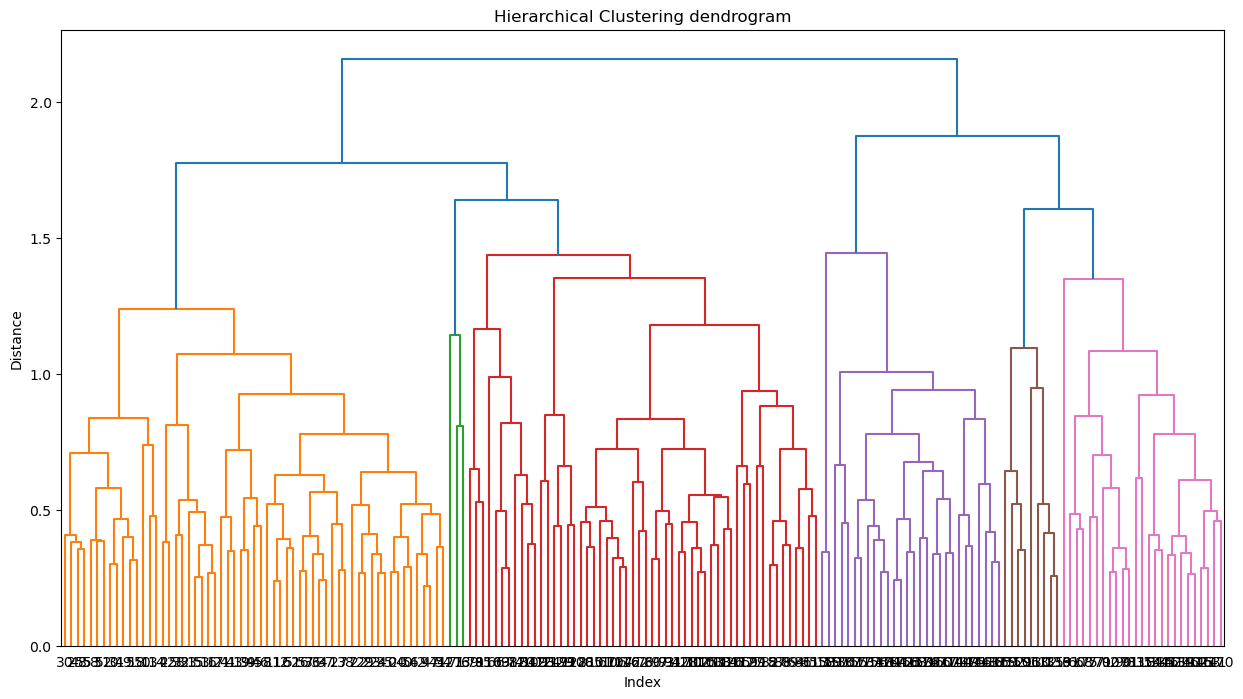

In [51]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_norm,method="complete",metric="euclidean")
plt.figure(figsize=(15,8));plt.title("Hierarchical Clustering dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [54]:
# applying agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete').fit(df_norm)
# apply labels to the clusters
h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)
#Assign this series to Univ Dataframe as column 
wine3['clust']=cluster_labels
wine3=wine3.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
wine3.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [56]:
wine3.clust.value_counts()

clust
0    116
1     34
2     28
Name: count, dtype: int64